In [3]:
#ENHANCED 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM

# Assuming your data is in a CSV file
df = pd.read_csv('AAPLenhanced.csv')

# Filling missing values
df.fillna(method='pad', inplace=True)
df.fillna(0, inplace=True)  # Fill remaining NaNs with 0

# Selecting relevant columns
data = df[['Adj.Close', 'Volume', 'SMA_50', 'GSPC.Adjusted', 'rsi']]

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (80% of the data)
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Scale the 'Adj.Close' data to be values between 0 and 1
close_scaler = MinMaxScaler(feature_range=(0, 1))
close_scaler.fit(df[['Adj.Close']].values)

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
sequence_length = 60
x_train = []
y_train = []

for i in range(sequence_length, len(train_data)):
    x_train.append(train_data[i-sequence_length:i, :])
    y_train.append(train_data[i, 0])  # Use only the 'Adj.Close' as the target variable

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)


# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


# Prepare the testing data
test_data = scaled_data[training_data_len - sequence_length:, :]
x_test = []
y_test = df['Adj.Close'][training_data_len:, ].values

for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i-sequence_length:i, :])

x_test = np.array(x_test)

# Reshape the data into the shape accepted by the RNN
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Predict the values for the test data
predictions = model.predict(x_test)

# Perform inverse transformation on the predicted values
predicted_adj_close = close_scaler.inverse_transform(predictions).flatten()

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, predicted_adj_close)
mae = mean_absolute_error(y_test, predicted_adj_close)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)





2023-06-21 23:53:14.777631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-21 23:53:19.109153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 23:53:19.111485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split

2023-06-21 23:53:20.981055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 23:53:20.983590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 23:53:20.985385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-06-21 23:53:24.040249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2023-06-21 23:53:24.399974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]


4169/4169 [==============================] - 165s 40ms/step - loss: 3.6549e-05


2023-06-21 23:58:49.521298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 23:58:49.523650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 23:58:49.525306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

34/34 [==============================] - 2s 24ms/step
Mean Squared Error (MSE): 292.4622444562788
Mean Absolute Error (MAE): 14.1842128919277


2023-06-17 13:23:53.479227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-17 13:23:53.481752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-17 13:23:53.483517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-06-17 13:23:55.864789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-17 13:23:55.867351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-17 13:23:55.869320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-06-17 13:23:59.464654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2023-06-17 13:23:59.898944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]


4169/4169 [==============================] - 158s 38ms/step - loss: 2.5033e-05


2023-06-17 13:29:18.566333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-17 13:29:18.569039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-17 13:29:18.570735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

34/34 [==============================] - 2s 22ms/step
Mean Squared Error (MSE): 45.290383466523686
Mean Absolute Error (MAE): 5.285901163623416


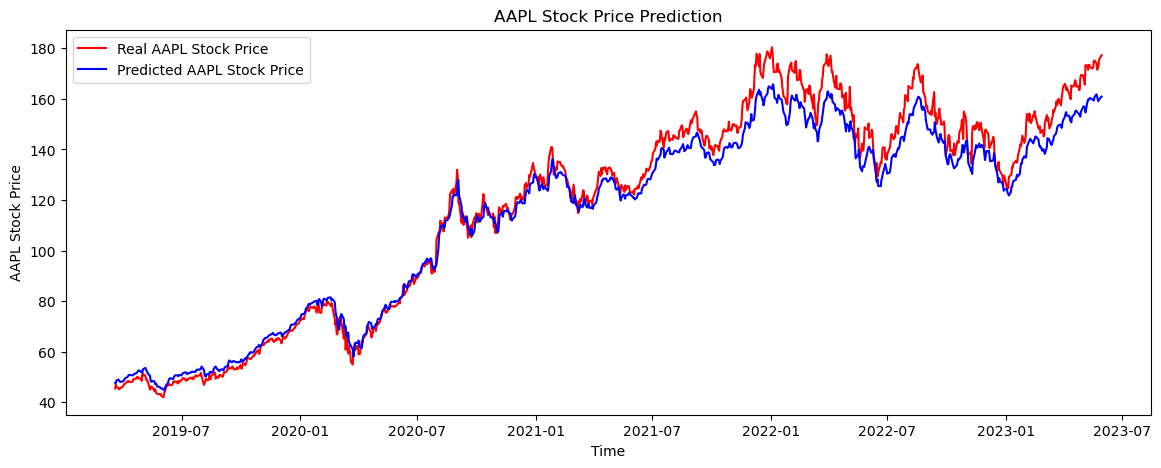

In [2]:
#RAW OHLCV

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM

# Assuming your data is in a CSV file
df = pd.read_csv('AAPLraw.csv')

# Filling missing values
df.fillna(method='pad', inplace=True)
df.fillna(0, inplace=True)  # Fill remaining NaNs with 0

# Selecting relevant columns
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (80% of the data)
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Scale the 'Adj.Close' data to be values between 0 and 1
close_scaler = MinMaxScaler(feature_range=(0, 1))
close_scaler.fit(df[['Adj Close']].values)

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
sequence_length = 60
x_train = []
y_train = []

for i in range(sequence_length, len(train_data)):
    x_train.append(train_data[i-sequence_length:i, :])
    y_train.append(train_data[i, 0])  # Use only the 'Adj.Close' as the target variable

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)


# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


# Prepare the testing data
test_data = scaled_data[training_data_len - sequence_length:, :]
x_test = []
y_test = df['Adj Close'][training_data_len:, ].values

for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i-sequence_length:i, :])

x_test = np.array(x_test)

# Reshape the data into the shape accepted by the RNN
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Predict the values for the test data
predictions = model.predict(x_test)

# Perform inverse transformation on the predicted values
predicted_adj_close = close_scaler.inverse_transform(predictions).flatten()

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, predicted_adj_close)
mae = mean_absolute_error(y_test, predicted_adj_close)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)


import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])

# Plot the actual vs predicted values
plt.figure(figsize=(14,5))
plt.plot(df['Date'][training_data_len:, ], y_test, color = 'red', label = 'Real AAPL Stock Price')
plt.plot(df['Date'][training_data_len:, ], predicted_adj_close, color = 'blue', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

